
# Part I - prosperLoanData Exploration Title
## by Mostafa Tamer Ghobashy

## Introduction

### This dataset is about 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join

In [2]:
# loading the dirty data
df = pd.read_csv(join("data", "dirty.csv"))

## Assesment

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
df.isna().sum().to_frame().T # for readability

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,0,0,0,84984,0,0,58848,25,0,0,...,0,0,0,0,0,0,0,0,0,0


### Focusing on the main features

In [5]:
# for clean data frame
df = df.copy()[["ListingCategory (numeric)", "ListingCreationDate",
                "BorrowerAPR", "BorrowerRate", "LenderYield", "LoanStatus",
                "ProsperRating (numeric)", "BorrowerState", "Occupation", "IncomeRange", "ClosedDate",
                "EstimatedEffectiveYield", "EstimatedLoss", "EstimatedReturn",
                "EmploymentStatus", "IsBorrowerHomeowner", "CurrentlyInGroup", "CreditGrade",
                "CreditScoreRangeLower", "CreditScoreRangeUpper", "Term", "LoanOriginalAmount",
                "DebtToIncomeRatio", "IncomeVerifiable", "StatedMonthlyIncome"]].reset_index(drop=True)

### Let's convert the `ListingCreationDate` to datetime for now because I'll need it as a datetime during the assesment

In [6]:
df["ListingCreationDate"] = df["ListingCreationDate"].astype("datetime64[ns]")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ListingCategory (numeric)  113937 non-null  int64         
 1   ListingCreationDate        113937 non-null  datetime64[ns]
 2   BorrowerAPR                113912 non-null  float64       
 3   BorrowerRate               113937 non-null  float64       
 4   LenderYield                113937 non-null  float64       
 5   LoanStatus                 113937 non-null  object        
 6   ProsperRating (numeric)    84853 non-null   float64       
 7   BorrowerState              108422 non-null  object        
 8   Occupation                 110349 non-null  object        
 9   IncomeRange                113937 non-null  object        
 10  ClosedDate                 55089 non-null   object        
 11  EstimatedEffectiveYield    84853 non-null   float64 

In [8]:
df.head(12)

,ListingCategory (numeric),ListingCreationDate,BorrowerAPR,BorrowerRate,LenderYield,LoanStatus,ProsperRating (numeric),BorrowerState,Occupation,IncomeRange,...,IsBorrowerHomeowner,CurrentlyInGroup,CreditGrade,CreditScoreRangeLower,CreditScoreRangeUpper,Term,LoanOriginalAmount,DebtToIncomeRatio,IncomeVerifiable,StatedMonthlyIncome
0,0,2007-08-26 19:09:29.263,0.16516,0.1580,0.1380,Completed,NaN,CO,Other,"$25,000-49,999",...,True,True,C,640.0,659.0,36,9425,0.17,True,3083.333333
1,2,2014-02-27 08:28:07.900,0.12016,0.0920,0.0820,Current,6.0,CO,Professional,"$50,000-74,999",...,False,False,NaN,680.0,699.0,36,10000,0.18,True,6125.000000
2,0,2007-01-05 15:00:47.090,0.28269,0.2750,0.2400,Completed,NaN,GA,Other,Not displayed,...,False,True,HR,480.0,499.0,36,3001,0.06,True,2083.333333
3,16,2012-10-22 11:02:35.010,0.12528,0.0974,0.0874,Current,6.0,GA,Skilled Labor,"$25,000-49,999",...,True,False,NaN,800.0,819.0,36,10000,0.15,True,2875.000000
4,2,2013-09-14 18:38:39.097,0.24614,0.2085,0.1985,Current,3.0,MN,Executive,"$100,000+",...,True,False,NaN,680.0,699.0,36,15000,0.26,True,9583.333333
5,1,2013-12-14 08:26:37.093,0.15425,0.1314,0.1214,Current,5.0,NM,Professional,"$100,000+",...,True,False,NaN,740.0,759.0,60,15000,0.36,True,8333.333333
6,1,2013-04-12 09:52:56.147,0.31032,0.2712,0.2612,Current,2.0,KS,Sales - Retail,"$25,000-49,999",...,False,False,NaN,680.0,699.0,36,3000,0.27,True,2083.333333
7,2,2013-05-05 06:49:27.493,0.23939,0.2019,0.1919,Current,4.0,CA,Laborer,"$25,000-49,999",...,False,False,NaN,700.0,719.0,36,10000,0.24,True,3355.750000
8,7,2013-12-02 10:43:39.117,0.07620,0.0629,0.0529,Current,7.0,IL,Food Service,"$25,000-49,999",...,True,False,NaN,820.0,839.0,36,10000,0.25,True,3333.333333
9,7,2013-12-02 10:43:39.117,0.07620,0.0629,0.0529,Current,7.0,IL,Food Service,"$25,000-49,999",...,True,False,NaN,820.0,839.0,36,10000,0.25,True,3333.333333


### Checking for missing values and duplicates

In [9]:
df.isnull().sum()

ListingCategory (numeric)        0
ListingCreationDate              0
BorrowerAPR                     25
BorrowerRate                     0
LenderYield                      0
LoanStatus                       0
ProsperRating (numeric)      29084
BorrowerState                 5515
Occupation                    3588
IncomeRange                      0
ClosedDate                   58848
EstimatedEffectiveYield      29084
EstimatedLoss                29084
EstimatedReturn              29084
EmploymentStatus              2255
IsBorrowerHomeowner              0
CurrentlyInGroup                 0
CreditGrade                  84984
CreditScoreRangeLower          591
CreditScoreRangeUpper          591
Term                             0
LoanOriginalAmount               0
DebtToIncomeRatio             8554
IncomeVerifiable                 0
StatedMonthlyIncome              0
dtype: int64

In [10]:
sum(df.duplicated())

871

### Checking the missing ProsperRating (numeric)s

In [11]:
(~df["ProsperRating (numeric)"].notna() == ~df["EstimatedEffectiveYield"].notna()).unique()

array([ True])

In [12]:
(df["ProsperRating (numeric)"].notna() == df["EstimatedEffectiveYield"].notna()).unique()

array([ True])

> Maybe these are old loans

In [13]:
df[~df["EstimatedEffectiveYield"].notna()]["ListingCreationDate"].describe()

count                            29084
mean     2007-08-27 00:51:35.113977856
min         2005-11-09 20:44:28.847000
25%      2007-02-02 16:45:29.103249920
50%      2007-09-10 09:54:47.410000128
75%      2008-04-19 20:08:41.629249792
max         2009-05-06 23:55:16.543000
Name: ListingCreationDate, dtype: object

In [14]:
df[df["EstimatedEffectiveYield"].notna()]["ListingCreationDate"].describe()

count                            84853
mean     2012-11-04 09:58:41.131399680
min         2009-07-13 18:01:24.347000
25%      2012-02-11 19:55:14.063000064
50%         2013-03-28 09:37:37.200000
75%      2013-10-26 05:50:16.023000064
max         2014-03-10 12:20:53.760000
Name: ListingCreationDate, dtype: object

> Old loans don't have prosper scores or estimated yields. Maybe because prosper score is a more modern crediting system, we might find credits for these pre 2009 loans.
> Another weird thing is that the number of uniques doesn't equal the count

In [15]:
df[df["CreditGrade"].notna()]["ListingCreationDate"].describe()

count                            28953
mean     2007-08-25 15:58:12.706427392
min         2005-11-09 20:44:28.847000
25%      2007-02-01 16:39:00.150000128
50%      2007-09-06 23:17:38.423000064
75%      2008-04-18 14:21:00.023000064
max         2009-05-04 13:07:15.977000
Name: ListingCreationDate, dtype: object

> Yep it's 2005-2009 which alignes with the data's documentation on kaggle.
> The documentation also states the following `ProsperRating (numeric): The Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA. Applicable for loans originated after July 2009.` Which means we can turn the `CreditGrade` to `ProsperRating`

In [16]:
df[df["CreditGrade"].notna()]["CreditGrade"].unique()

array(['C', 'HR', 'AA', 'D', 'B', 'E', 'A', 'NC'], dtype=object)

In [17]:
df[df["ProsperRating (numeric)"].notna()]["ListingCreationDate"].describe()

count                            84853
mean     2012-11-04 09:58:41.131399680
min         2009-07-13 18:01:24.347000
25%      2012-02-11 19:55:14.063000064
50%         2013-03-28 09:37:37.200000
75%      2013-10-26 05:50:16.023000064
max         2014-03-10 12:20:53.760000
Name: ListingCreationDate, dtype: object

> I think we can use the pre-2009, `CreditGrade`, to update the `ProsperRating`.

#### Now let's check `Occupation`

In [18]:
df["Occupation"].unique()

array(['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Waiter/Waitress', 'Construction', 'Computer Programmer',
       'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
       'Military Enlisted', 'Clerical', nan, 'Teacher', 'Clergy',
       'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
       "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Food Service Management',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Tradesman - Mechanic', 'Medical Technician', 'Professor',
       'Postal Service', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping',
       'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
       'Engineer - Chemical', 'Doctor', 'Chemist',


> Looks promising but there are some redundancy in the job titles

#### Let's have a look on `EmploymentStatus` and its relativity to `Occupation`

In [19]:
df["EmploymentStatus"].unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

> There are "Employed" and "Not employed" while haveing "Full-time" and "Part-time"

In [20]:
df[df["EmploymentStatus"] == "Not employed"]["Occupation"].value_counts()

Occupation
Other                                 793
Homemaker                               9
Student - College Graduate Student      9
Student - College Senior                3
Student - College Junior                3
Student - College Sophomore             2
Retail Management                       2
Skilled Labor                           2
Student - Community College             2
Professional                            1
Psychologist                            1
Teacher's Aide                          1
Sales - Commission                      1
Sales - Retail                          1
Nurse's Aide                            1
Waiter/Waitress                         1
Student - Technical School              1
Student - College Freshman              1
Analyst                                 1
Name: count, dtype: int64

> This can be due to recent unemployment or being a student.

In [21]:
df[df["EmploymentStatus"].isnull()]["Occupation"].value_counts()

Series([], Name: count, dtype: int64)

In [22]:
df[df["EmploymentStatus"].isnull()]["ListingCreationDate"].describe()

count                             2255
mean     2006-06-02 10:10:44.227306368
min         2005-11-09 20:44:28.847000
25%      2006-04-16 17:21:22.044999936
50%      2006-05-27 05:54:48.616999936
75%      2006-06-30 05:14:05.016499968
max         2007-02-09 08:00:09.510000
Name: ListingCreationDate, dtype: object

### Let's check the `LoanStatus`

In [23]:
df["LoanStatus"].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

> Looks like there are some cancelled loans.
> I think we can make it payed, non-payed, or charged-off.

### What are the data that doesn't have Estimations for the investors

In [24]:
df[~df["EstimatedEffectiveYield"].notna()][["EstimatedEffectiveYield", "EstimatedLoss", "EstimatedReturn"]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 29084 entries, 0 to 113927
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EstimatedEffectiveYield  0 non-null      float64
 1   EstimatedLoss            0 non-null      float64
 2   EstimatedReturn          0 non-null      float64
dtypes: float64(3)
memory usage: 908.9 KB


> The data which has no estimations are the same rows for all types of estimations

In [25]:
df[~df["EstimatedEffectiveYield"].notna()]["ListingCreationDate"].describe()

count                            29084
mean     2007-08-27 00:51:35.113977856
min         2005-11-09 20:44:28.847000
25%      2007-02-02 16:45:29.103249920
50%      2007-09-10 09:54:47.410000128
75%      2008-04-19 20:08:41.629249792
max         2009-05-06 23:55:16.543000
Name: ListingCreationDate, dtype: object

> Looks like theese rows are the same pre-2009 loans

### Checking the estimations

In [26]:
df["EstimatedLoss"].describe()

count    84853.000000
mean         0.080306
std          0.046764
min          0.004900
25%          0.042400
50%          0.072400
75%          0.112000
max          0.366000
Name: EstimatedLoss, dtype: float64

In [27]:
df["EstimatedReturn"].describe()

count    84853.000000
mean         0.096068
std          0.030403
min         -0.182700
25%          0.074080
50%          0.091700
75%          0.116600
max          0.283700
Name: EstimatedReturn, dtype: float64

> Looks like there are some outliers

### Checking the `IncomeRange`

In [28]:
df["IncomeRange"].unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

> There are some redundancy in the income ranges, i.e. `Not employed`, `Not displayed`, and `$0`.

### Checking the `CreditScoreRangeLower` and `CreditScoreRangeUpper`

In [29]:
df[["CreditScoreRangeLower", "CreditScoreRangeUpper"]].describe()

,CreditScoreRangeLower,CreditScoreRangeUpper
count,113346.000000,113346.000000
mean,685.567731,704.567731
std,66.458275,66.458275
min,0.000000,19.000000
25%,660.000000,679.000000
50%,680.000000,699.000000
75%,720.000000,739.000000
max,880.000000,899.000000


> Looks like that the datatype should be an int

In [30]:
df[df["CreditScoreRangeLower"] == 0]["ListingCreationDate"].describe()

count                              133
mean     2006-10-14 16:19:59.565909504
min         2006-04-20 10:08:24.753000
25%         2006-07-31 14:07:30.360000
50%      2006-11-08 07:25:15.947000064
75%      2006-12-27 13:22:24.132999936
max         2007-02-11 13:40:55.490000
Name: ListingCreationDate, dtype: object

> That seems right, for they are pre-2008

### Let's check the `StatedMonthlyIncome`

In [31]:
df["StatedMonthlyIncome"].describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

In [32]:
df[["StatedMonthlyIncome", "IncomeRange"]].head()

,StatedMonthlyIncome,IncomeRange
0,3083.333333,"$25,000-49,999"
1,6125.000000,"$50,000-74,999"
2,2083.333333,Not displayed
3,2875.000000,"$25,000-49,999"
4,9583.333333,"$100,000+"


> The Income could be annual other than monthly; or even better, we can use the monthly income to populate the income range.

### Checking the `BorrowerState`

In [33]:
df[df["BorrowerState"].isnull()]["ListingCreationDate"].describe()

count                             5515
mean     2006-11-21 16:13:56.213180672
min         2005-11-09 20:44:28.847000
25%         2006-08-01 11:51:36.740000
50%      2006-12-03 17:48:46.230000128
75%      2007-03-04 07:29:26.013499904
max         2008-02-14 13:38:51.960000
Name: ListingCreationDate, dtype: object

> Looks like the data is poorly documented pre-2009/2008. I might remove them, but I have another plans for them.

### Checking the `DebtToIncomeRatio`

In [34]:
df["DebtToIncomeRatio"].describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

> Looks like there is a huge outlier; I might aswell remove it.

### Checking the `LoanOriginalAmount`

In [35]:
df["LoanOriginalAmount"].describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

> There are also some outliers here

### The data ranges from 2005-2014

## Main insights
- Most of the columns are unnecessary. I Think I'll have to filter the dataset to focus on the main features.
- `ListingCreationDate`, and `ClosedDate` are object d-types.
- `CreditGrade` is mainly NaNs but I think we can use it to update the `ProspeRating`.
- `Occupation` is redundant.
- Some loans don't count, for they are cancelled.
- `IncomeRange` can be populated by `StatedMonthlyIncome`.
- We can lose 25 data points by removing the empty APR.
- `DebtToIncomeRatio` has a huge outlier.
- `LoanOriginalAmount` has some outliers.

## Tidyness
- `Term` could be timedelta.
- `LoanStatus` could be payed, non-payed, or charged-off.
- `IncomeRange` has some redundancy.
- `ListingCategory (numeric)` can be string for easie of analysis.
- I think we can use the `ListingCreationDate` to get quarters and seasons of the year.

## Cleaning

### Removing outliers from `LoanOriginalAmount`

In [36]:
df = df.drop(df[df["LoanOriginalAmount"] > df["LoanOriginalAmount"].quantile(0.95)]["LoanOriginalAmount"].index).reset_index(drop=True)

### Removing outliers from `DebtToIncomeRatio`

In [37]:
df = df.drop(df[df["DebtToIncomeRatio"] > df["DebtToIncomeRatio"].quantile(0.99)]["DebtToIncomeRatio"].index).reset_index(drop=True)

### Filtering the nan APR

In [38]:
df = df.drop(df[df["BorrowerAPR"].isnull()].index).reset_index(drop=True)

### Converting bad datatypes

In [39]:
df[["ClosedDate", "ListingCreationDate"]] = df[["ClosedDate", "ListingCreationDate"]].astype("datetime64[ns]")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107626 entries, 0 to 107625
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ListingCategory (numeric)  107626 non-null  int64         
 1   ListingCreationDate        107626 non-null  datetime64[ns]
 2   BorrowerAPR                107626 non-null  float64       
 3   BorrowerRate               107626 non-null  float64       
 4   LenderYield                107626 non-null  float64       
 5   LoanStatus                 107626 non-null  object        
 6   ProsperRating (numeric)    80245 non-null   float64       
 7   BorrowerState              102395 non-null  object        
 8   Occupation                 104135 non-null  object        
 9   IncomeRange                107626 non-null  object        
 10  ClosedDate                 52763 non-null   datetime64[ns]
 11  EstimatedEffectiveYield    80245 non-null   float64 

In [40]:
df["Term"] = (df["Term"] * 30).astype("timedelta64[D]")

### Updating `ProsperRating`

In [41]:
credit_to_prosper = {
    "HR": 1,
    "E": 2,
    "D": 3,
    "C": 4,
    "B": 5,
    "A": 6,
    "AA": 7,
    "NC": 0
}

df["ProsperRating (numeric)"].fillna(df["CreditGrade"].map(credit_to_prosper), inplace=True)

/tmp/ipykernel_25247/320689746.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ProsperRating (numeric)"].fillna(df["CreditGrade"].map(credit_to_prosper), inplace=True)


> we successfully filled in the missing prosper scores

In [42]:
df["ProsperRating (numeric)"].isnull().sum()

np.int64(130)

> But I will filter the nan prosper ratings out

In [43]:
df = df[df["ProsperRating (numeric)"].notna()]

### Minimizing the redundancy of `Occupation`

In [44]:
def clean_profession(profession):
    """Cleans and categorizes profession names."""
    if pd.isna(profession):
        return "Unknown"

    profession = profession.strip().lower()

    category_mapping = {
        "education": ["teacher", "professor", "principal", "teacher's aide"],
        "medical": ["nurse (rn)", "nurse (lpn)", "nurse's aide", "doctor", "dentist", "pharmacist", "medical technician", "psychologist"],
        "engineering": ["engineer - mechanical", "engineer - electrical", "engineer - chemical"],
        "trades": ["tradesman - mechanic", "tradesman - electrician", "tradesman - carpenter", "tradesman - plumber"],
        "law": ["attorney", "judge"],
        "sales": ["sales - retail", "sales - commission", "retail management", "realtor", "car dealer"],
        "military": ["military enlisted", "military officer"],
        "food_service": ["food service", "food service management", "waiter/waitress"],
        "science": ["scientist", "chemist", "biologist"],
        "transportation": ["truck driver", "bus driver", "pilot - private/commercial", "flight attendant"],
        "government": ["civil service", "postal service", "police officer/correction officer", "fireman"],
        "students": ["student - college freshman", "student - college sophomore", "student - college junior",
                     "student - college senior", "student - college graduate student", "student - technical school",
                     "student - community college"],
        "other": ["homemaker", "investor", "clergy", "religious", "landscaping", "analyst", "computer programmer"]
    }

    for category, keywords in category_mapping.items():
        if profession in keywords:
            return category.capitalize()

    return "Other"

In [45]:
df["Occupation"] = df["Occupation"].apply(clean_profession)

In [46]:
df["Occupation"].unique()

array(['Other', 'Sales', 'Food_service', 'Government', 'Engineering',
       'Military', 'Unknown', 'Education', 'Law', 'Medical',
       'Transportation', 'Trades', 'Science', 'Students'], dtype=object)

### Removing cancelled loans

In [47]:
df.drop(df[df["LoanStatus"] == "Cancelled"].index, inplace=True)

In [48]:
df["LoanStatus"].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Past Due (61-90 days)',
       'Past Due (31-60 days)', 'Past Due (91-120 days)',
       'FinalPaymentInProgress', 'Past Due (>120 days)'], dtype=object)

### Tidying up `ListingCategory (numeric)`

In [49]:
# 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
tidying_listing_cat = {
    0: "Not Available",
    1: "Debt Consolidation",
    2: "Home Improvement",
    3: "Business",
    4: "Personal & Household",  # Merging "Personal Loan" & "Household Expenses"
    5: "Student Use",
    6: "Auto",
    7: "Other",
    8: "Baby & Adoption",
    9: "Large Purchases",  # Merging "Boat", "RV", "Large Purchases"
    10: "Medical & Cosmetic",  # Merging "Cosmetic Procedure" & "Medical/Dental"
    11: "Wedding & Engagement",  # Merging "Wedding Loans" & "Engagement Ring"
    12: "Green Loans",
    13: "Personal & Household",  # "Household Expenses" now merged with Personal Loan
    14: "Large Purchases",  # Kept for merged category
    15: "Medical & Cosmetic",  # Kept for merged category
    16: "Auto",
    17: "Large Purchases",  # Merged RV here
    18: "Taxes",
    19: "Vacation",
    20: "Wedding & Engagement",  # Kept for merged category
}

df["ListingCategory"] = df["ListingCategory (numeric)"].map(lambda x: tidying_listing_cat.get(x))

In [50]:
df = df.drop(columns="ListingCategory (numeric)")

In [51]:
df["ListingCategory"].unique()

array(['Not Available', 'Home Improvement', 'Auto', 'Debt Consolidation',
       'Other', 'Personal & Household', 'Medical & Cosmetic',
       'Wedding & Engagement', 'Vacation', 'Business', 'Taxes',
       'Baby & Adoption', 'Large Purchases', 'Student Use', 'Green Loans'],
      dtype=object)

> I merged similar categories

### Tidying up `LoanStatus`

In [52]:
tidying_loan_status = {
    "Completed": "Payed",
    "Chargedoff": "Failed",
    "Defaulted": "Failed",
}

df["LoanStatus"] = df["LoanStatus"].map(lambda x: tidying_loan_status.get(x, "Current"))

In [53]:
df["LoanStatus"].unique()

array(['Payed', 'Current', 'Failed'], dtype=object)

### Implementing feature engineering on `IncomeRange`

In [54]:
income_cleaning = lambda x: "Unknown" if x.lower().strip("$") in {"not employed", "not displayed", "0"} else x
df["IncomeRange"] = df["IncomeRange"].apply(income_cleaning)

In [55]:
df["IncomeRange"].unique()

array(['$25,000-49,999', '$50,000-74,999', 'Unknown', '$100,000+',
       '$75,000-99,999', '$1-24,999'], dtype=object)

### adding annual income and populating the income range

In [56]:
df["AnnualIncome"] = (df["StatedMonthlyIncome"] * 12).round(0).astype("Int64")
df = df.drop(columns=["StatedMonthlyIncome", "CreditGrade"])

In [57]:
df["AnnualIncome"].describe()

count        107491.0
mean     64943.308714
std      89191.122894
min               0.0
25%           38000.0
50%           55000.0
75%           80000.0
max        21000035.0
Name: AnnualIncome, dtype: Float64

> Looks like there are some outliers in the anual income

In [58]:
df.drop(df[(df["AnnualIncome"] > df["AnnualIncome"].quantile(0.85))].index, inplace=True)

In [59]:
df[df["IncomeRange"] == "Unknown"]["IncomeRange"].describe()

count        7927
unique          1
top       Unknown
freq         7927
Name: IncomeRange, dtype: object

In [60]:
def categorize_income(income):
    if income < 1:
        return "Unknown"
    elif income <= 24999:
        return "$1-24,999"
    elif income <= 49999:
        return "$25,000-49,999"
    elif income <= 74999:
        return "$50,000-74,999"
    elif income <= 99999:
        return "$75,000-99,999"
    else:
        return "$100,000+"

df.loc[df["IncomeRange"] == "Unknown", "IncomeRange"]\
= df.loc[df["IncomeRange"] == "Unknown", "AnnualIncome"].apply(categorize_income)

In [61]:
df["IncomeRange"].unique()

array(['$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$1-24,999',
       'Unknown', '$100,000+'], dtype=object)

In [62]:
df[df["IncomeRange"] == "Unknown"]["IncomeRange"].describe()

count        1335
unique          1
top       Unknown
freq         1335
Name: IncomeRange, dtype: object

### Feature engineering on `ListingCreationDate`

In [63]:
df["Quarter"] = df["ListingCreationDate"].dt.quarter

df["Year"] = df["ListingCreationDate"].dt.year

### Final check

In [64]:
df = df.drop(columns=["level_0", "index"], errors="ignore").reset_index(drop=True)

In [65]:
df.isnull().sum()

ListingCreationDate            0
BorrowerAPR                    0
BorrowerRate                   0
LenderYield                    0
LoanStatus                     0
ProsperRating (numeric)        0
BorrowerState               4663
Occupation                     0
IncomeRange                    0
ClosedDate                 45483
EstimatedEffectiveYield    24575
EstimatedLoss              24575
EstimatedReturn            24575
EmploymentStatus            1880
IsBorrowerHomeowner            0
CurrentlyInGroup               0
CreditScoreRangeLower        443
CreditScoreRangeUpper        443
Term                           0
LoanOriginalAmount             0
DebtToIncomeRatio           7170
IncomeVerifiable               0
ListingCategory                0
AnnualIncome                   0
Quarter                        0
Year                           0
dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91561 entries, 0 to 91560
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ListingCreationDate      91561 non-null  datetime64[ns]
 1   BorrowerAPR              91561 non-null  float64       
 2   BorrowerRate             91561 non-null  float64       
 3   LenderYield              91561 non-null  float64       
 4   LoanStatus               91561 non-null  object        
 5   ProsperRating (numeric)  91561 non-null  float64       
 6   BorrowerState            86898 non-null  object        
 7   Occupation               91561 non-null  object        
 8   IncomeRange              91561 non-null  object        
 9   ClosedDate               46078 non-null  datetime64[ns]
 10  EstimatedEffectiveYield  66986 non-null  float64       
 11  EstimatedLoss            66986 non-null  float64       
 12  EstimatedReturn          66986 n

### Exporting the cleaned data

In [67]:
df.to_csv("./data/clean.csv", index=False)

## Univariate Exploration

### 1. What is the most frequent reason for getting a loan?

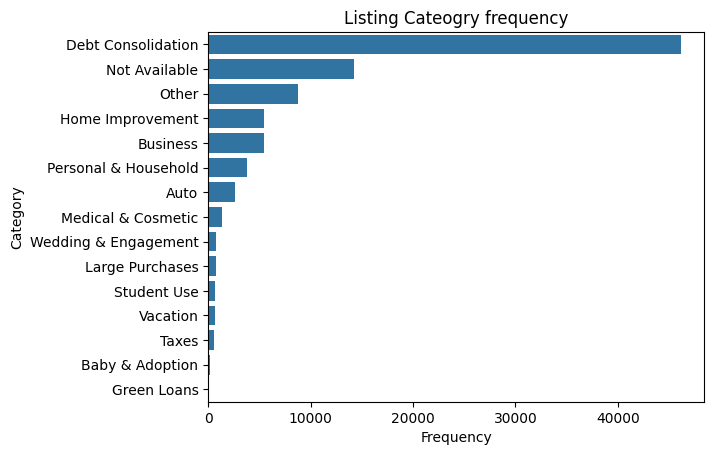

In [68]:
freq_listing_cat = df["ListingCategory"].value_counts().sort_values(ascending=False)
sns.barplot(y=freq_listing_cat.index, x=freq_listing_cat.values) # I didn't use a normal histogram to sort the values

plt.ylabel("Category")
plt.xlabel("Frequency")
plt.title("Listing Cateogry frequency")
plt.show()

> Looks like most of the loans are for paying debts.

### 2. How many borrowers are in groups?

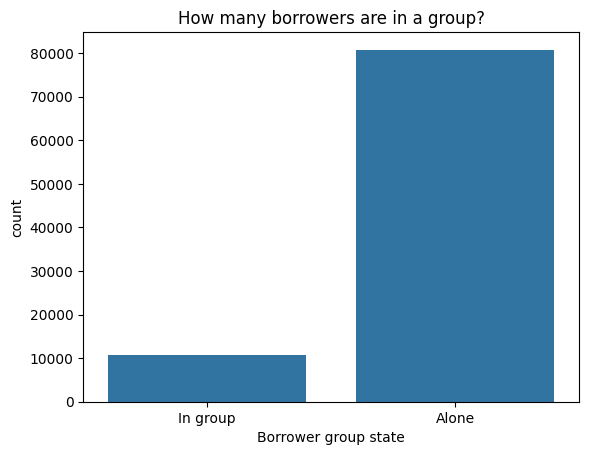

In [69]:
df["GroupStatus"] = df["CurrentlyInGroup"].replace({True: "In group", False: "Alone"})

sns.countplot(data=df, x="GroupStatus", order=["In group", "Alone"])

plt.xlabel("Borrower group state")
plt.ylabel("count")
plt.title("How many borrowers are in a group?")
plt.show()

> Looks like most of the borrowers are alone.

### 3. What is the distribution of the loan amount?

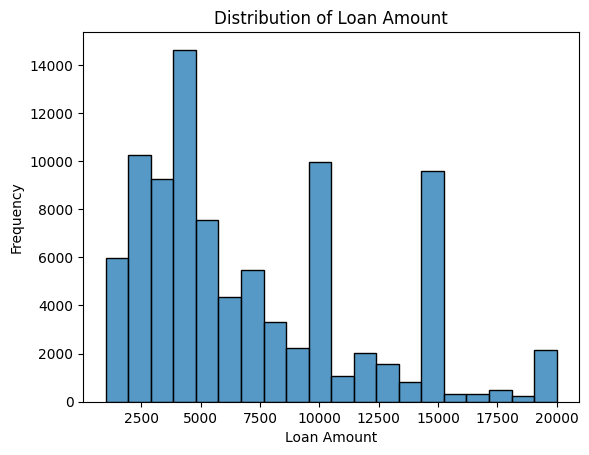

In [70]:
sns.histplot(data=df, x="LoanOriginalAmount", bins=20)

plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Loan Amount")
plt.show()

> Looks like the loan amount has a rough, right-skewed distribution.

### 4. What is the distribution of the annual income?

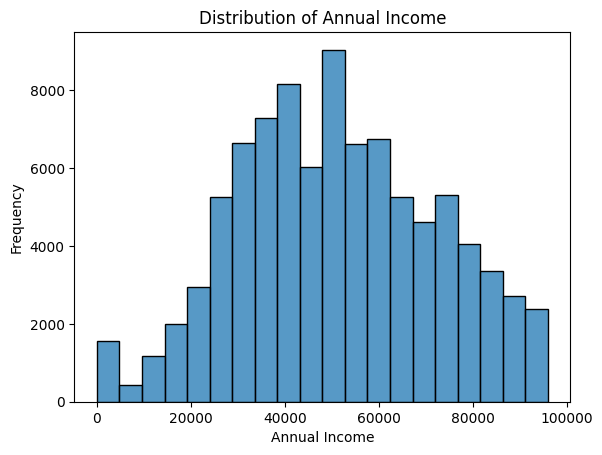

In [71]:
sns.histplot(data=df, x="AnnualIncome", bins=20)

plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.title("Distribution of Annual Income")
plt.show()

> Looks like it has a near-normal distribution but with several peak points.

### 5. What is the distribution of the borrower APR?

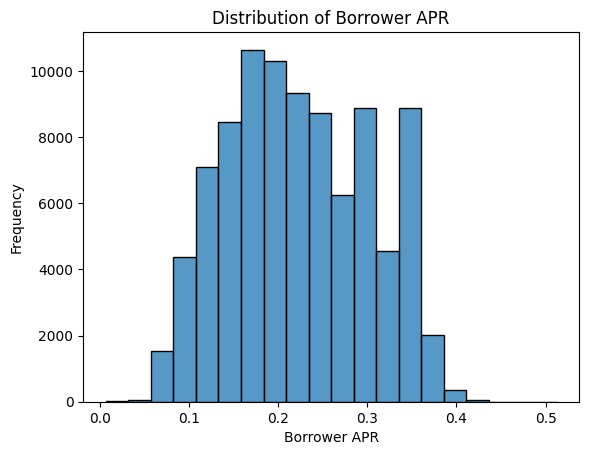

In [72]:
sns.histplot(data=df, x="BorrowerAPR", bins=20)

plt.xlabel("Borrower APR")
plt.ylabel("Frequency")
plt.title("Distribution of Borrower APR")
plt.show()

> The borrower APR is normally distributed.

### 6. What is the distribution of the borrower rate?

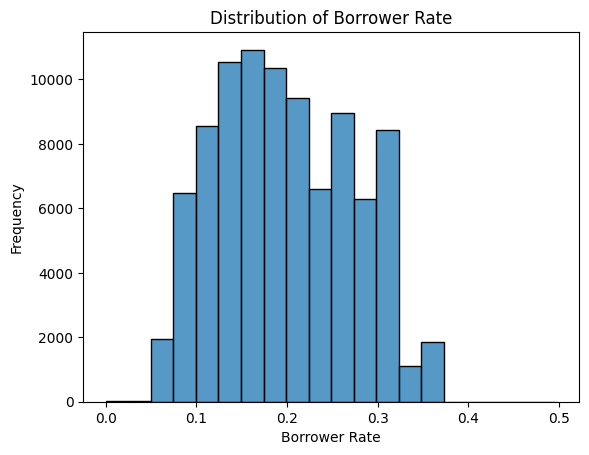

In [73]:
sns.histplot(data=df, x="BorrowerRate", bins=20)

plt.xlabel("Borrower Rate")
plt.ylabel("Frequency")
plt.title("Distribution of Borrower Rate")
plt.show()

> As expected, it looks nearly identicle to the borrower APR.

### 7. What is the distribution of the debt to income ratio?

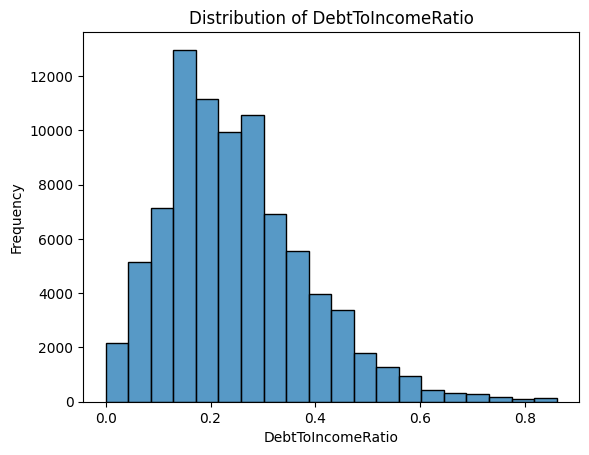

In [74]:
sns.histplot(data=df, x="DebtToIncomeRatio", bins=20)

plt.xlabel("DebtToIncomeRatio")
plt.ylabel("Frequency")
plt.title("Distribution of DebtToIncomeRatio")
plt.show()

> Looks like it has a near-normal distribution but right-skewed.

### 8. Looking at the Loss and return distributions

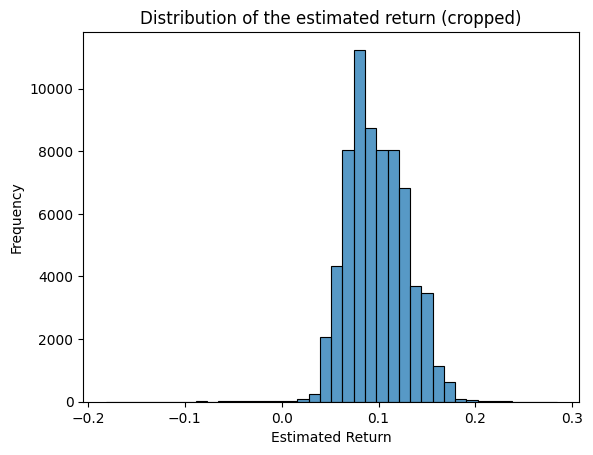

In [75]:
sns.histplot(data=df, x="EstimatedReturn", bins=40)

plt.xlabel("Estimated Return")
plt.ylabel("Frequency")
plt.title("Distribution of the estimated return (cropped)")
plt.show()

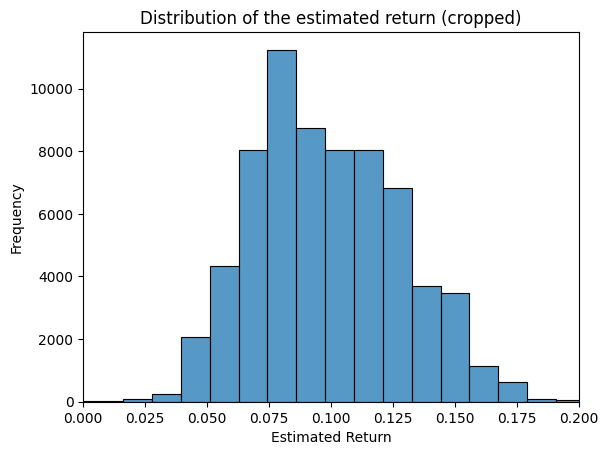

In [76]:
sns.histplot(data=df, x="EstimatedReturn", bins=40)

plt.xlabel("Estimated Return")
plt.ylabel("Frequency")
plt.xlim(0, 0.2)
plt.title("Distribution of the estimated return (cropped)")
plt.show()

> it looks like it has a normal distribution, but with a lot of outliers both ways.

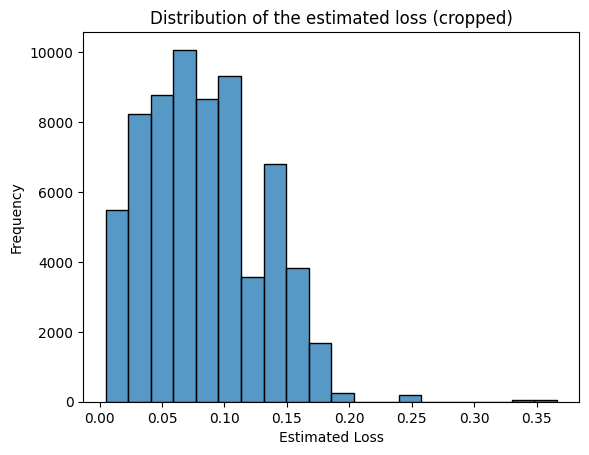

In [77]:
sns.histplot(data=df, x="EstimatedLoss", bins=20)

plt.xlabel("Estimated Loss")
plt.ylabel("Frequency")
plt.title("Distribution of the estimated loss (cropped)")
plt.show()

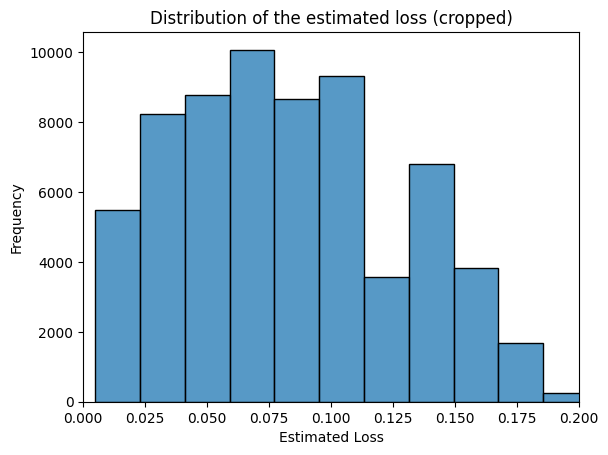

In [78]:
sns.histplot(data=df, x="EstimatedLoss", bins=20)

plt.xlabel("Estimated Loss")
plt.ylabel("Frequency")
plt.title("Distribution of the estimated loss (cropped)")
plt.xlim(0.0, 0.2)
plt.show()

> Looks like it has a random distribution

### 9. What is the most frequent term?

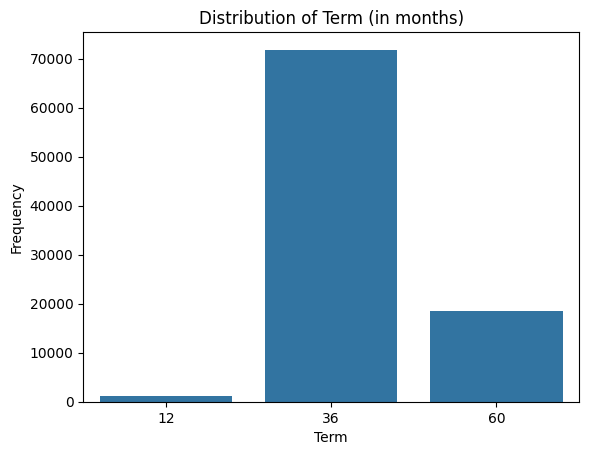

In [79]:
sns.countplot(x=(df["Term"].dt.days // 30).astype("int"))

plt.xlabel("Term")
plt.ylabel("Frequency")
plt.title("Distribution of Term (in months)")
plt.show()

> Looks like it the most frequent term is 36 months

### 10. What time of the year people tend to finish paying loans?

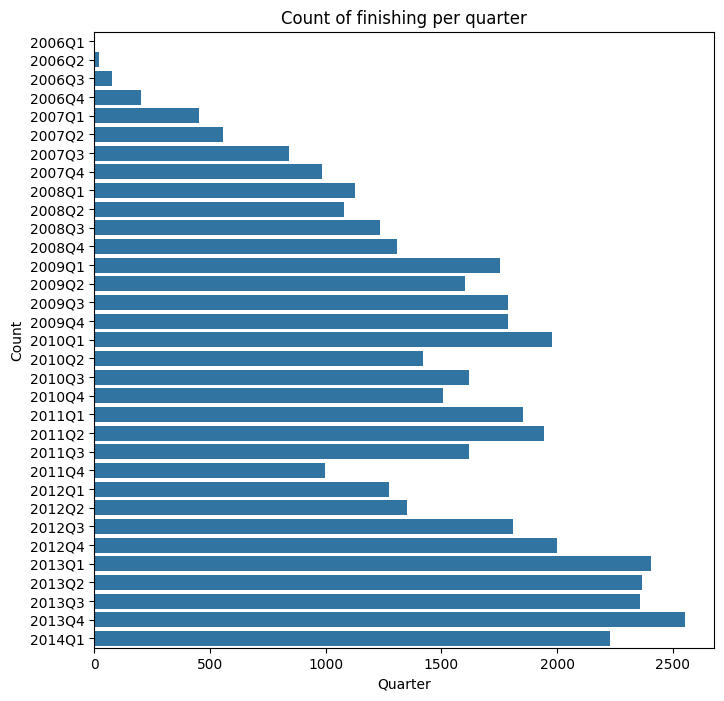

In [80]:
df["ClosedQuarter"] = df["ClosedDate"].dt.to_period("Q")

plt.figure(figsize=(8, 8))
quarterly_counts = df.groupby("ClosedQuarter").size().reset_index(name="Count")

sns.barplot(data=quarterly_counts, y="ClosedQuarter", x="Count")

plt.xlabel("Quarter")
plt.ylabel("Count")
plt.title("Count of finishing per quarter")
plt.show()

> Looks like more and more loans are getting repaid in the fall/winter.

## Bivariate Exploration


### 1. How does the borrower APR vary with the Debt to income ratio?

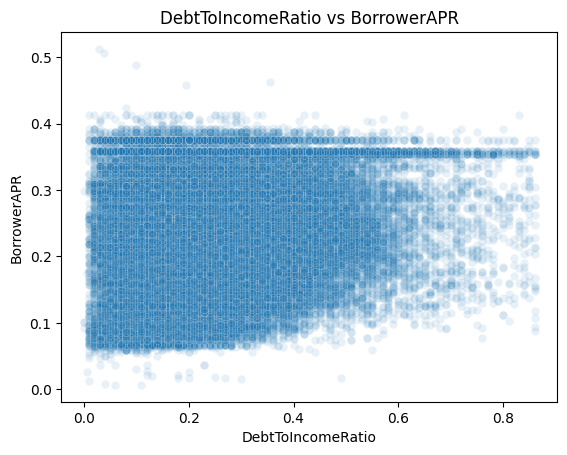

In [81]:
sns.scatterplot(data=df, x="DebtToIncomeRatio", y="BorrowerAPR", alpha=0.1)

plt.xlabel("DebtToIncomeRatio")
plt.ylabel("BorrowerAPR")
plt.title("DebtToIncomeRatio vs BorrowerAPR")
plt.show()

> Looks like the APR is static in relation to the debt to income ratio

### 2. How does the lowest credit score requirement change over time?

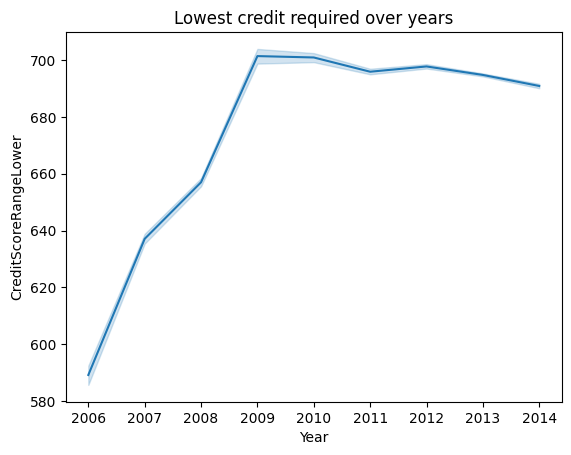

In [82]:
sns.lineplot(data=df, x="Year", y="CreditScoreRangeLower")

plt.xlabel("Year")
plt.ylabel("CreditScoreRangeLower")
plt.title("Lowest credit required over years")
plt.show()

> As expected, the lowest credit score requirement was nearly none pre-2008/2009; then it increased and stayed nearly the same.

### 3. How does the borrower APR vary with the lender yield?

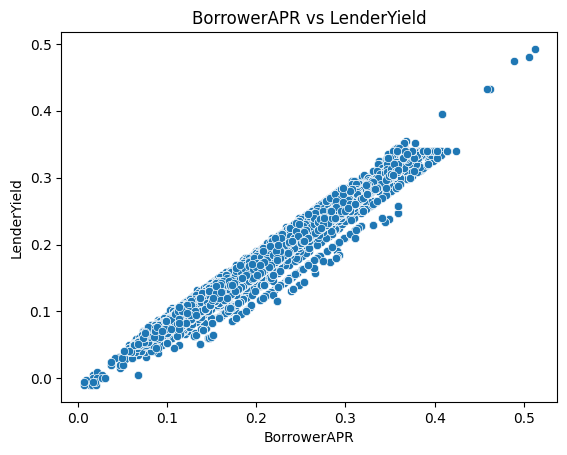

In [83]:
sns.scatterplot(data=df, x="BorrowerAPR", y="LenderYield")

plt.xlabel("BorrowerAPR")
plt.ylabel("LenderYield")
plt.title("BorrowerAPR vs LenderYield")
plt.show()

> As expected the APR has a very strong 1:1 relationship with the lender yield

### 4. What is the relationship between the borrower APR and the loan amount?

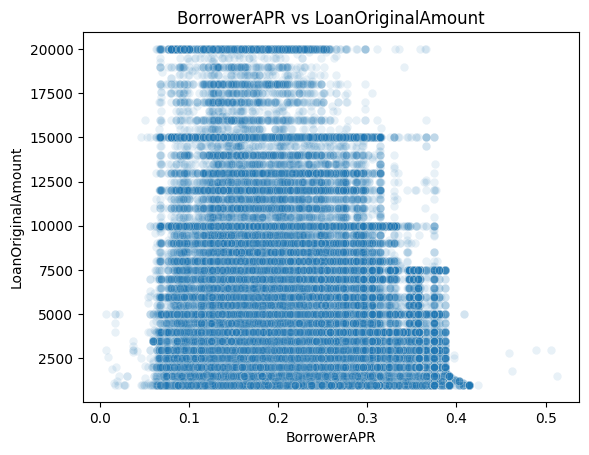

In [84]:
sns.scatterplot(data=df, x="BorrowerAPR", y="LoanOriginalAmount", alpha=0.1)

plt.xlabel("BorrowerAPR")
plt.ylabel("LoanOriginalAmount")
plt.title("BorrowerAPR vs LoanOriginalAmount")
plt.show()

> As expected the APR is static in relation to the loan amount, but it also looks like borrowers tend to get multiples of $5000 as the loan gets larger.

### 5. How does the loan amount change with the loan status?

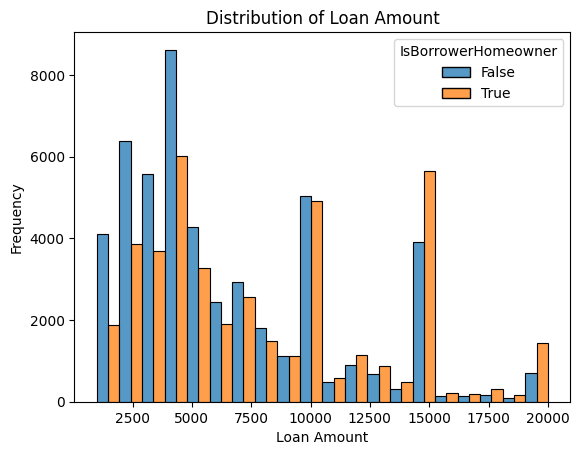

In [85]:
sns.histplot(data=df, x="LoanOriginalAmount", hue="IsBorrowerHomeowner", bins=20, multiple="dodge")

plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Loan Amount")
plt.show()

> Looks like borrowers tend to get larger loans if they are homeowners. This makes sense as homeowners have more money to put down on a loan.

### 6. How does the debt to income ratio change over time?

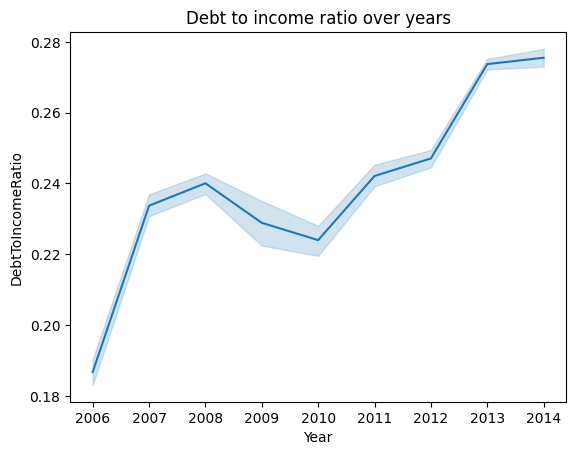

In [86]:
sns.lineplot(data=df, y="DebtToIncomeRatio", x="Year")

plt.xlabel("Year")
plt.ylabel("DebtToIncomeRatio")
plt.title("Debt to income ratio over years")
plt.show()

> Looks like the debt to income ratio has increased over the years. This makes sense as homeowners have more money to put down on a loan, which leads to people getting more loans to repay their debts.

### 7. Does being a home owner affect the type of loan?

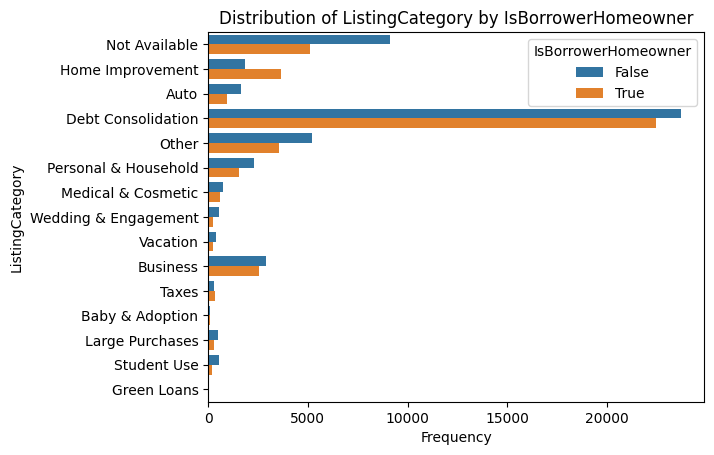

In [87]:
sns.countplot(data=df, y="ListingCategory", hue="IsBorrowerHomeowner")

plt.xlabel("Frequency")
plt.ylabel("ListingCategory")
plt.title("Distribution of ListingCategory by IsBorrowerHomeowner")
plt.show()

> It looks like home owners have the same loans, but what I find weird is that non-home owners get home improvement loans.

### 8. How does the income change over the years?

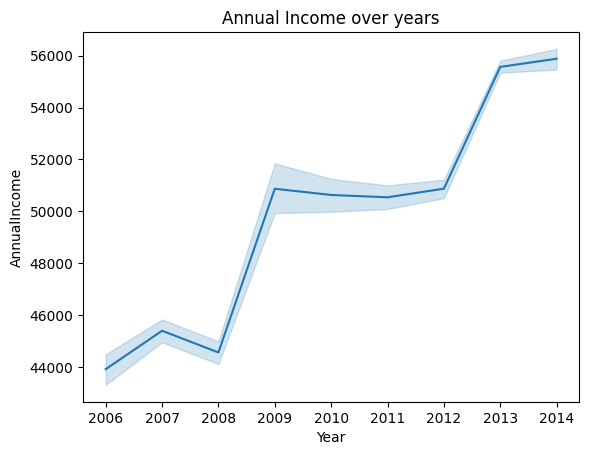

In [88]:
sns.lineplot(data=df, y="AnnualIncome", x="Year")

plt.xlabel("Year")
plt.ylabel("AnnualIncome")
plt.title("Annual Income over years")
plt.show()

> As expected, the income has increased over the years with a big jump in 2008/2009.

### 9. How does the lender yield change over the years?

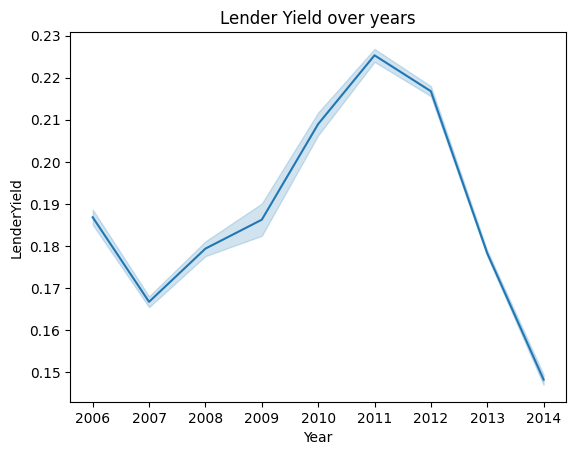

In [89]:
sns.lineplot(data=df, y="LenderYield", x="Year")

plt.xlabel("Year")
plt.ylabel("LenderYield")
plt.title("Lender Yield over years")
plt.show()

> This decline might be due to either the scarcity of the data or a decline in the loans.

### 10. Did investors stop investing due to the losses or the decrease in the loans?

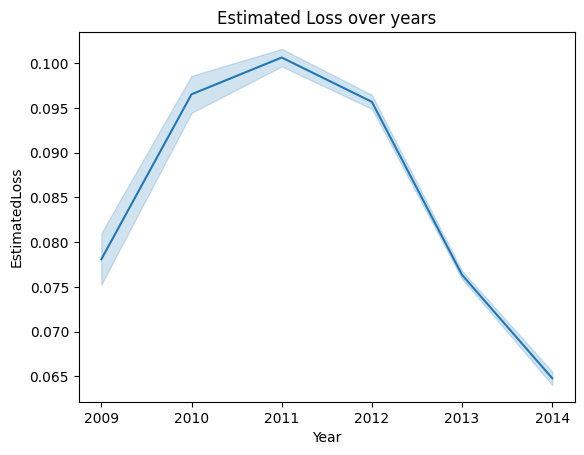

In [90]:
sns.lineplot(data=df, y="EstimatedLoss", x="Year")

plt.xlabel("Year")
plt.ylabel("EstimatedLoss")
plt.title("Estimated Loss over years")
plt.show()

> This means either the data is scarce in the last 2 years or the investors stopped investing due to wrong estimates.

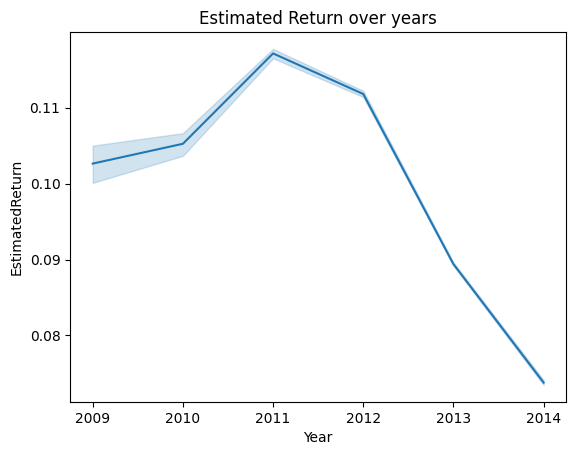

In [91]:
sns.lineplot(data=df, y="EstimatedReturn", x="Year")

plt.xlabel("Year")
plt.ylabel("EstimatedReturn")
plt.title("Estimated Return over years")
plt.show()

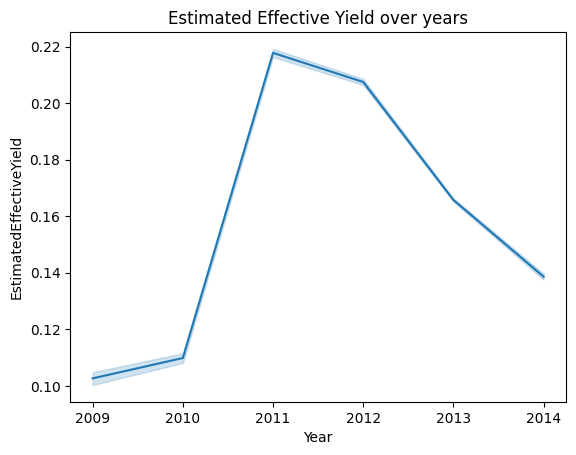

In [92]:
sns.lineplot(data=df, y="EstimatedEffectiveYield", x="Year")

plt.xlabel("Year")
plt.ylabel("EstimatedEffectiveYield")
plt.title("Estimated Effective Yield over years")
plt.show()

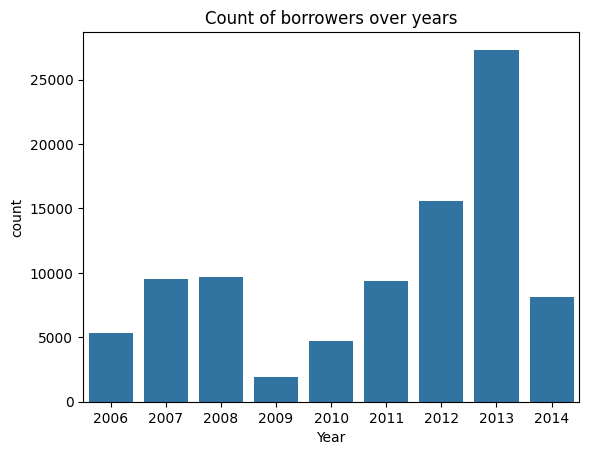

In [93]:
sns.countplot(data=df, x="Year")

plt.xlabel("Year")
plt.ylabel("count")
plt.title("Count of borrowers over years")
plt.show()

> I think this is a good indicator that the data is scarce in the last 2 years

### 11. Does the income range affect the debt to income ratio?

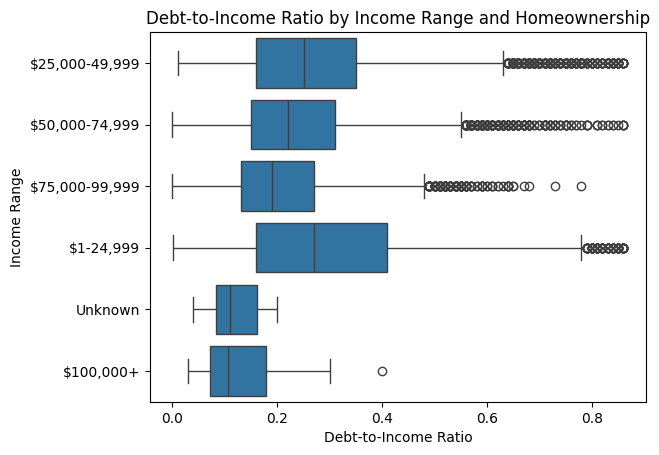

In [94]:
sns.boxplot(data=df, y="IncomeRange", x="DebtToIncomeRatio")

plt.ylabel("Income Range")
plt.xlabel("Debt-to-Income Ratio")
plt.title("Debt-to-Income Ratio by Income Range and Homeownership")

plt.show()

> This shows that people with lower income have higher DTI.

### 12. How accurate are the estimates?

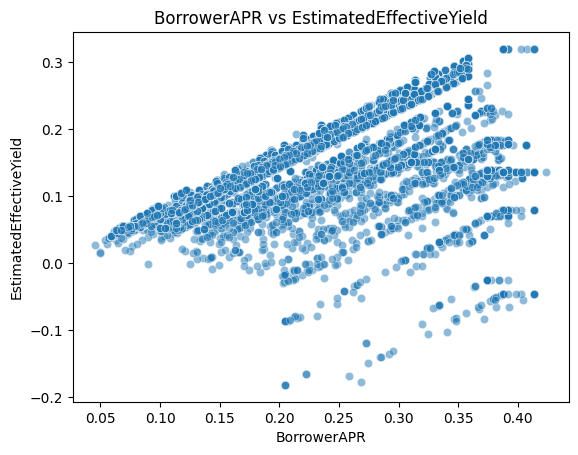

In [95]:
sns.scatterplot(data=df, x="BorrowerAPR", y="EstimatedEffectiveYield", alpha=0.5)

plt.xlabel("BorrowerAPR")
plt.ylabel("EstimatedEffectiveYield")
plt.title("BorrowerAPR vs EstimatedEffectiveYield")
plt.show()

### 13. How does the average credit score change over the years?

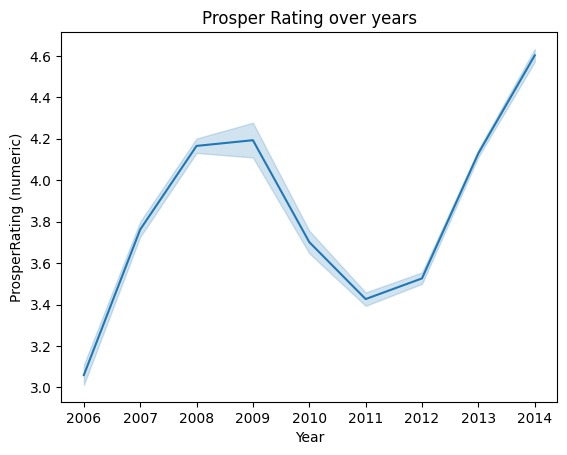

In [96]:
sns.lineplot(data=df, y="ProsperRating (numeric)", x="Year")

plt.xlabel("Year")
plt.ylabel("ProsperRating (numeric)")
plt.title("Prosper Rating over years")
plt.show()

> Weirdly, the rating has decreased after 2008/2009.

## Multivariate Exploration

### 1. How likely does people with higher income ranges get loans?

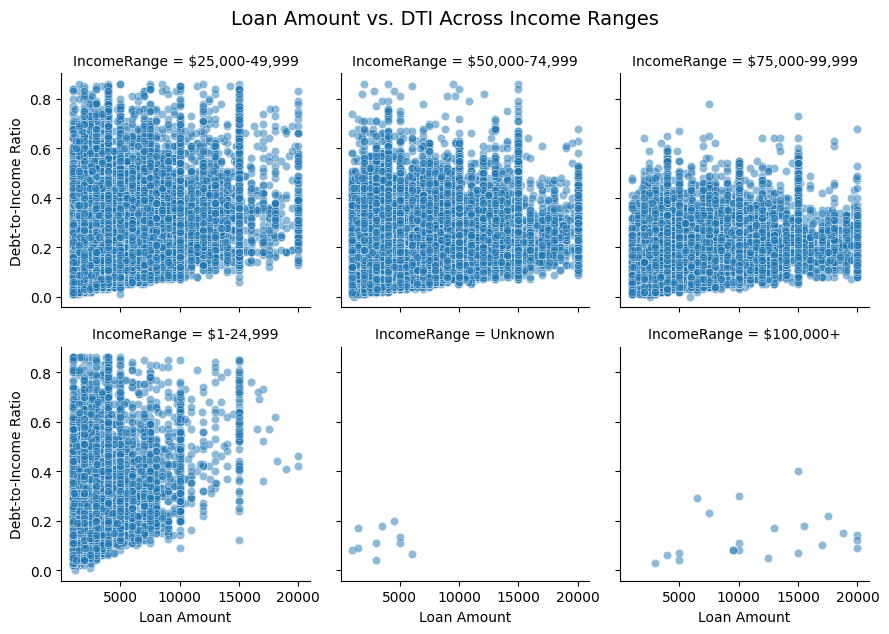

In [97]:
g = sns.FacetGrid(df, col="IncomeRange", col_wrap=3)


g.map(sns.scatterplot, "LoanOriginalAmount", "DebtToIncomeRatio", alpha=0.5)

g.set_axis_labels("Loan Amount", "Debt-to-Income Ratio")
g.fig.suptitle("Loan Amount vs. DTI Across Income Ranges", fontsize=14, y=1.05)

plt.show()

> This shows that people with higher income ranges have a lower chance to get a loan, and if they do get a loan, they get it with a low DTI.

### 2. Is there any correlation between numeric values?

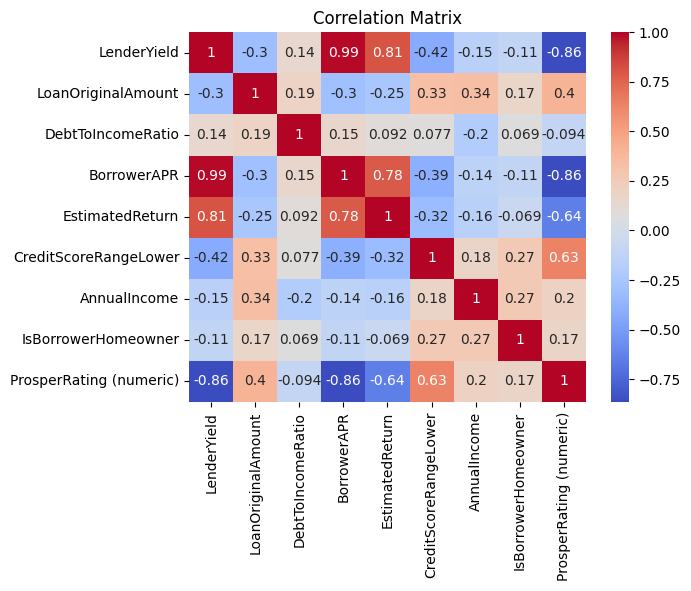

In [98]:
num_vars = ["LenderYield", "LoanOriginalAmount",
            "DebtToIncomeRatio", "BorrowerAPR",
            "EstimatedReturn", "CreditScoreRangeLower",
            "AnnualIncome", "IsBorrowerHomeowner", "ProsperRating (numeric)"]

corr = df[num_vars].corr()

sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title("Correlation Matrix")
plt.show()

> Insights
- There is a strong positive correlation between EstimatedReturn and BorrowerAPR.
- Weirdly, there is a negative correlation between BorrowerAPR and CreditScoreRangeLower.
- There is a very strong possitive correlation between BorrowerAPR/EstimatedReturn and LenderYield.
- I think that the credit score affects the intrest rate of the loan.

### 3. Is there any correlation between DTI and the annual income of the borrower? and does being a homeowner affect DTI?

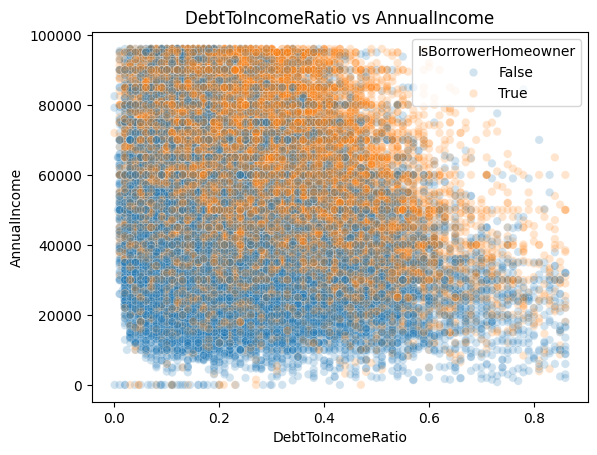

In [99]:
sns.scatterplot(data=df, x="DebtToIncomeRatio", y="AnnualIncome", hue="IsBorrowerHomeowner", alpha=0.2)

plt.xlabel("DebtToIncomeRatio")
plt.ylabel("AnnualIncome")
plt.title("DebtToIncomeRatio vs AnnualIncome")
plt.show()

> It looks like there is a negative correlation between DebtToIncomeRatio and AnnualIncome but weak, which makes scence.

### 4. How does the occupation of the borrower affect their income and the credit score?

/home/mostafa/Desktop/dev/term_project/.proj/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


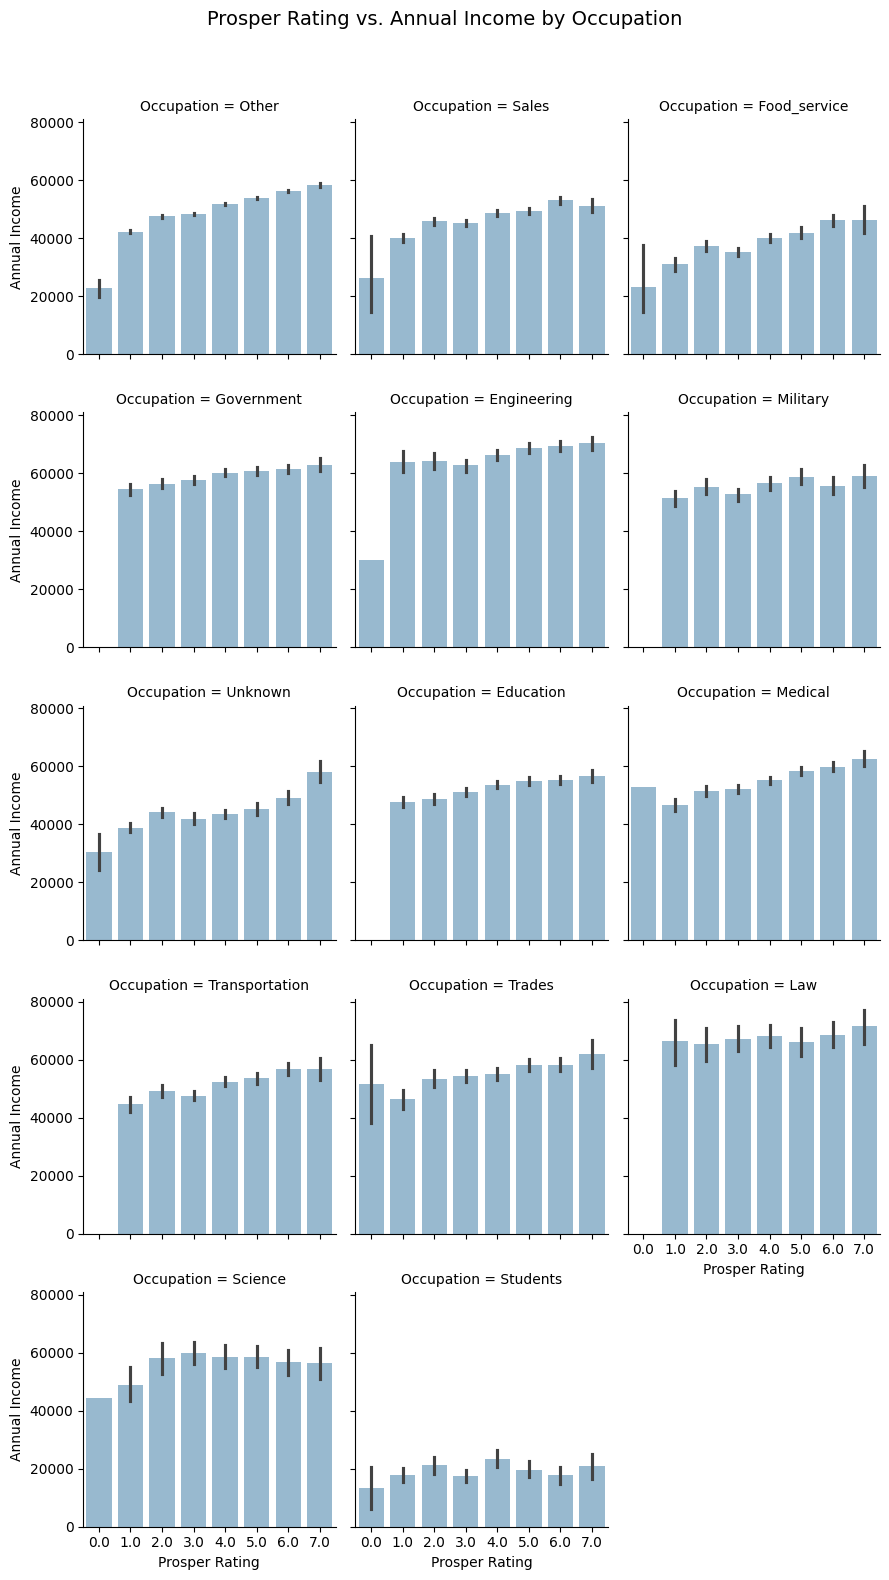

In [100]:
g = sns.FacetGrid(df, col="Occupation", col_wrap=3)

g.map(sns.barplot, "ProsperRating (numeric)", "AnnualIncome", alpha=0.5)

g.set_axis_labels("Prosper Rating", "Annual Income")
g.fig.suptitle("Prosper Rating vs. Annual Income by Occupation", fontsize=14, y=1.05)

plt.show()

> Main insights
- Government/Military/Law/Transportation occupations are always trusted.
- Least trusted occupation is Trading which makes sense.

### 5. How does the employment status affect the credit score over the years?

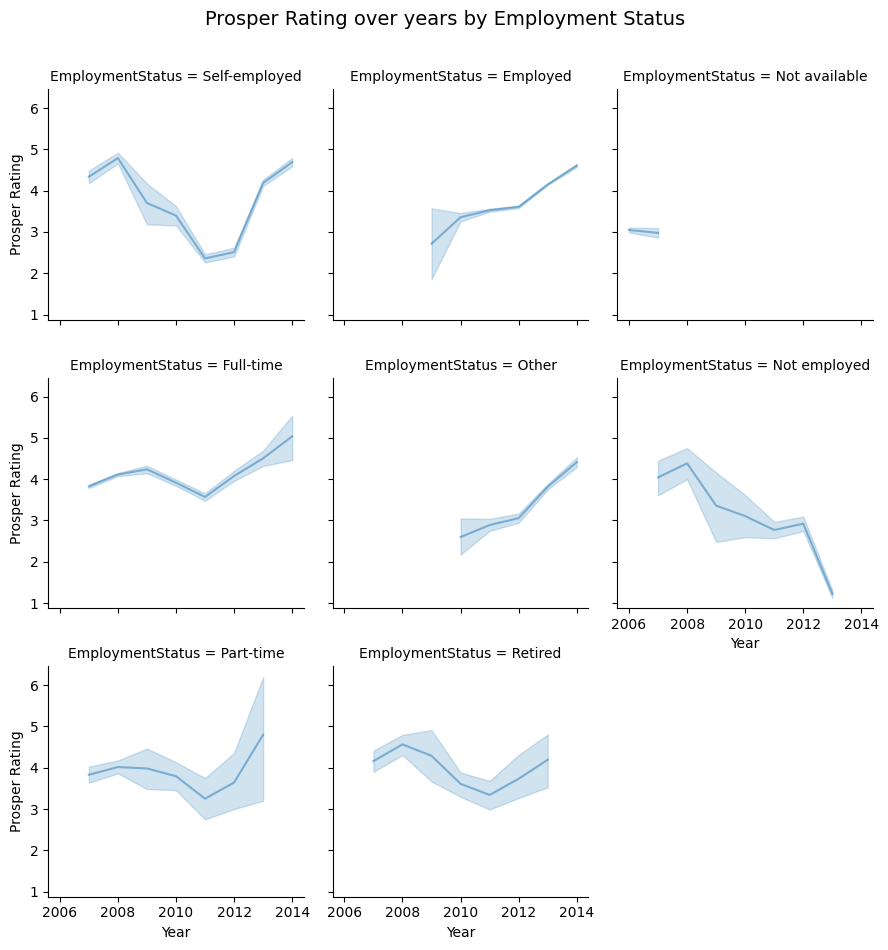

In [101]:
g = sns.FacetGrid(df, col="EmploymentStatus", col_wrap=3)

g.map(sns.lineplot, "Year", "ProsperRating (numeric)", alpha=0.5)

g.set_axis_labels("Year", "Prosper Rating")
g.fig.suptitle("Prosper Rating over years by Employment Status", fontsize=14, y=1.05)

plt.show()

> Main insights
- Self employment was trusted then dropped in trustability but returned.
- Ordinary employment was always trusted and still is.
- Not available status only took place in pre-2008/2009.
- Full-time employment was static but increased in trustability.
- Non-employment is plummeting in trustability.
- Part-time and retirement are slowly increasing in trustability.

### 6. How does the loan amount affect its probability of payment over time?

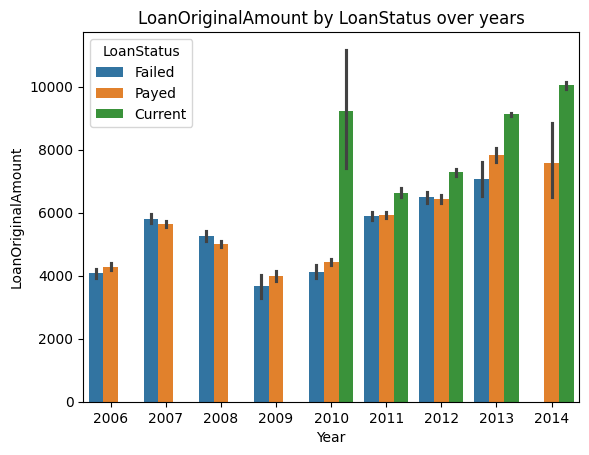

In [102]:
sns.barplot(data=df, x="Year", y="LoanOriginalAmount", hue="LoanStatus", dodge=True)

plt.xlabel("Year")
plt.ylabel("LoanOriginalAmount")
plt.title("LoanOriginalAmount by LoanStatus over years")
plt.show()

> The loan amount increases over the years and the probability of full payment is also increasing.

## Conclusions

## Findings
1. Debt consolidation is the primary reason for loans.
2. Most loans have a 36-month payment term.
3. Loan amounts are right-skewed, often in multiples of $5,000.
4. Income distribution is roughly normal, peaking at $5,000.
5. Borrowers tend to repay loans more often in the last two quarters of the year.
6. Debt-to-income ratio (DTI) is negatively correlated with income, especially among homeowners.
7. Credit scores negatively correlate with borrower APR, borrower rate, and lender yield.
8. Minimum credit requirements increased in 2008/2009.
9. Trusted occupations include Government, Military, Law, and Transportation, while Trading is the least trusted.
10. Self-employment was less trusted in 2010-2012 but gained trust after 2013/2014.
11. People with lower incomes tend to have a higher loans and DTI than those with higher incomes.
12. The average credit score declined after 2009 but started increasing afterward.